# time Series EDA(accessing data,resempling,exploding,rolling etc)

In [44]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime


In [178]:
df_tesla=pd.read_csv('TSLA.csv',parse_dates=True,index_col="Date")

In [77]:
df_tesla.head()
df_tesla.shape

(1258, 6)

In [78]:
df_tesla.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-02-16  304.683319  308.809998  300.403320  307.796661  307.796661   
2022-02-17  304.420013  306.166656  291.366669  292.116669  292.116669   
2022-02-18  295.333344  295.623322  279.203339  285.660004  285.660004   
2022-02-22  278.043335  285.576660  267.033325  273.843323  273.843323   
2022-02-23  276.809998  278.433319  253.520004  254.679993  254.679993   

              Volume  
Date                  
2022-02-16  51294300  
2022-02-17  55178400  
2022-02-18  68501700  
2022-02-22  83288100  
2022-02-23  95256900

<AxesSubplot:xlabel='Date'>

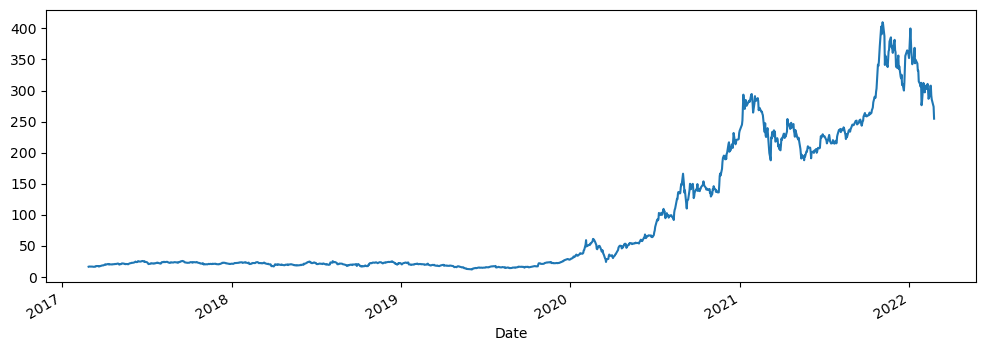

In [82]:
df_tesla['Close'].plot(figsize=(12,4))


<AxesSubplot:xlabel='Date'>

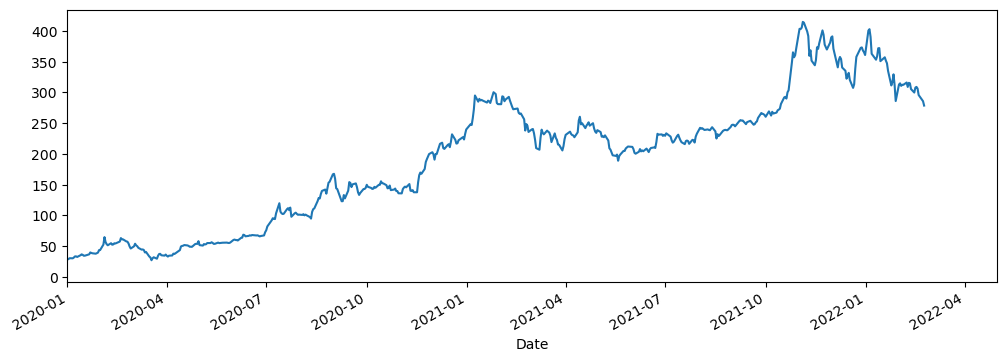

In [84]:
df_tesla['High'].plot(xlim=['2020-01-01','2022-05-01'],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

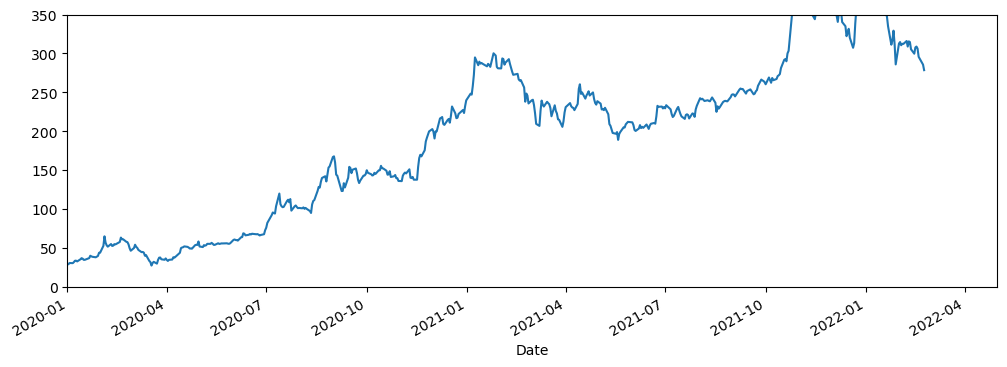

In [87]:
df_tesla['High'].plot(xlim=['2020-01-01','2022-05-01'],ylim=[0,350],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

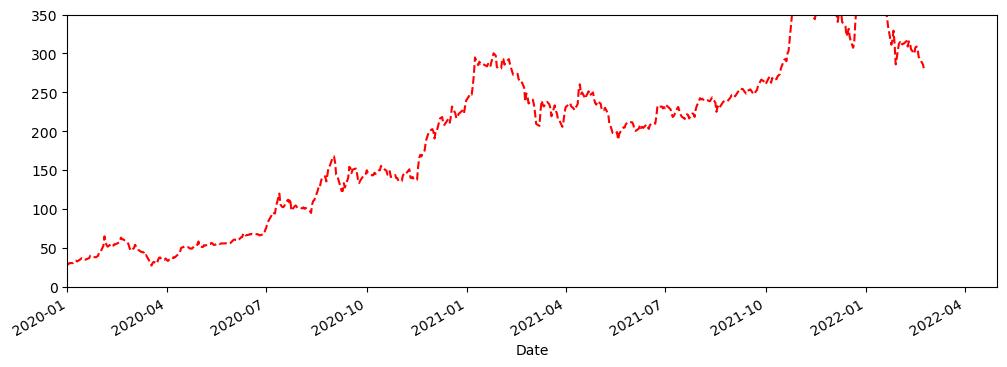

In [89]:
df_tesla['High'].plot(xlim=['2020-01-01','2022-05-01'],ylim=[0,350],figsize=(12,4),color='red',ls='--')

just some eda's 

In [90]:
df_tesla

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-02-27   16.544666   16.557333   16.134001   16.415333   16.415333   
2017-02-28   16.279333   16.733334   16.260000   16.666000   16.666000   
2017-03-01   16.945333   16.990000   16.607332   16.667999   16.667999   
2017-03-02   16.647333   16.885332   16.551332   16.698668   16.698668   
2017-03-03   16.716000   16.793333   16.600000   16.771334   16.771334   
...                ...         ...         ...         ...         ...   
2022-02-16  304.683319  308.809998  300.403320  307.796661  307.796661   
2022-02-17  304.420013  306.166656  291.366669  292.116669  292.116669   
2022-02-18  295.333344  295.623322  279.203339  285.660004  285.660004   
2022-02-22  278.043335  285.576660  267.033325  273.843323  273.843323   
2022-02-23  276.809998  278.433319  253.520004  254.679993  254.679993   

               Volume  
Date                   
2017-02-27  171912000  
2017-02-28   91171500  
2017-03-01   72142500  
2017-03-02   50277000  
2017-03-03   43791000  
...               ...  
2022-02-16   51294300  
2022-02-17   55178400  
2022-02-18   68501700  
2022-02-22   83288100  
2022-02-23   95256900  

[1258 rows x 6 columns]

In [91]:

df_tesla.index

DatetimeIndex(['2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10',
               ...
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-14',
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-22', '2022-02-23'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [132]:
index=df_tesla.loc['2017-02-27':'2021-03-01'].index
index

DatetimeIndex(['2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10',
               ...
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-03-01'],
              dtype='datetime64[ns]', name='Date', length=1009, freq=None)

In [134]:
df_tesla.loc[['2017-02-27','2021-03-01']]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-02-27   16.544666   16.557333   16.134001   16.415333   16.415333   
2021-03-01  230.036667  239.666672  228.350006  239.476669  239.476669   

               Volume  
Date                   
2017-02-27  171912000  
2021-03-01   81408600

In [140]:
share_open=df_tesla.loc[index]['Open']

In [141]:
share_open

Date
2017-02-27     16.544666
2017-02-28     16.279333
2017-03-01     16.945333
2017-03-02     16.647333
2017-03-03     16.716000
                 ...    
2021-02-23    220.710007
2021-02-24    237.283340
2021-02-25    242.050003
2021-02-26    233.333328
2021-03-01    230.036667
Name: Open, Length: 1009, dtype: float64

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

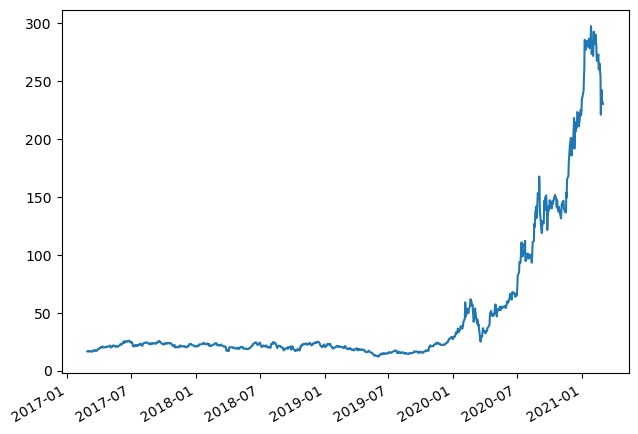

In [146]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

set and reset index 

In [179]:
df_tesla.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333  171912000
2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   91171500
2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   72142500
2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   50277000
2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   43791000

In [180]:
df_tesla=df_tesla.reset_index()

In [181]:
df_tesla.set_index(df_tesla["Date"])

Date        Open        High         Low       Close  \
Date                                                                    
2017-02-27 2017-02-27   16.544666   16.557333   16.134001   16.415333   
2017-02-28 2017-02-28   16.279333   16.733334   16.260000   16.666000   
2017-03-01 2017-03-01   16.945333   16.990000   16.607332   16.667999   
2017-03-02 2017-03-02   16.647333   16.885332   16.551332   16.698668   
2017-03-03 2017-03-03   16.716000   16.793333   16.600000   16.771334   
...               ...         ...         ...         ...         ...   
2022-02-16 2022-02-16  304.683319  308.809998  300.403320  307.796661   
2022-02-17 2022-02-17  304.420013  306.166656  291.366669  292.116669   
2022-02-18 2022-02-18  295.333344  295.623322  279.203339  285.660004   
2022-02-22 2022-02-22  278.043335  285.576660  267.033325  273.843323   
2022-02-23 2022-02-23  276.809998  278.433319  253.520004  254.679993   

             Adj Close     Volume  
Date                               
2017-02-27   16.415333  171912000  
2017-02-28   16.666000   91171500  
2017-03-01   16.667999   72142500  
2017-03-02   16.698668   50277000  
2017-03-03   16.771334   43791000  
...                ...        ...  
2022-02-16  307.796661   51294300  
2022-02-17  292.116669   55178400  
2022-02-18  285.660004   68501700  
2022-02-22  273.843323   83288100  
2022-02-23  254.679993   95256900  

[1258 rows x 7 columns]

In [182]:
df_tesla

Date        Open        High         Low       Close   Adj Close  \
0    2017-02-27   16.544666   16.557333   16.134001   16.415333   16.415333   
1    2017-02-28   16.279333   16.733334   16.260000   16.666000   16.666000   
2    2017-03-01   16.945333   16.990000   16.607332   16.667999   16.667999   
3    2017-03-02   16.647333   16.885332   16.551332   16.698668   16.698668   
4    2017-03-03   16.716000   16.793333   16.600000   16.771334   16.771334   
...         ...         ...         ...         ...         ...         ...   
1253 2022-02-16  304.683319  308.809998  300.403320  307.796661  307.796661   
1254 2022-02-17  304.420013  306.166656  291.366669  292.116669  292.116669   
1255 2022-02-18  295.333344  295.623322  279.203339  285.660004  285.660004   
1256 2022-02-22  278.043335  285.576660  267.033325  273.843323  273.843323   
1257 2022-02-23  276.809998  278.433319  253.520004  254.679993  254.679993   

         Volume  
0     171912000  
1      91171500  
2      72142500  
3      50277000  
4      43791000  
...         ...  
1253   51294300  
1254   55178400  
1255   68501700  
1256   83288100  
1257   95256900  

[1258 rows x 7 columns]

In [185]:
df_tesla=df_tesla.reset_index()

In [186]:
df_tesla.head()

Date       Open       High        Low      Close  Adj Close     Volume
0 2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333  171912000
1 2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   91171500
2 2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   72142500
3 2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   50277000
4 2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   43791000

In [187]:
df_tesla=df_tesla.set_index("Date",drop=True)

In [188]:
df_tesla.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333  171912000
2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   91171500
2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   72142500
2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   50277000
2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   43791000

With Time library we can see the current machine time and date
month,year,seconds,weekday,etc

# Time resampling 

In [189]:
df_tesla.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333  171912000
2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   91171500
2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   72142500
2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   50277000
2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   43791000

In [190]:
df_tesla.resample(rule='A').min()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-12-31   16.279333   16.433332   16.134001   16.246000   16.246000   
2018-12-31   16.851999   17.355333   16.306000   16.704000   16.704000   
2019-12-31   12.073333   12.445333   11.799333   11.931333   11.931333   
2020-12-31   24.980000   26.990667   23.367332   24.081333   24.081333   
2021-12-31  184.183334  188.736664  179.830002  187.666672  187.666672   
2022-12-31  276.809998  278.433319  253.520004  254.679993  254.679993   

              Volume  
Date                  
2017-12-31  43791000  
2018-12-31  46210500  
2019-12-31  36984000  
2020-12-31  52073100  
2021-12-31  29401800  
2022-12-31  50729100

In [191]:
df_tesla.resample(rule="A").max()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-12-31   25.779333   25.974001   25.290001   25.666668   25.666668   
2018-12-31   25.000000   25.830667   24.474667   25.304667   25.304667   
2019-12-31   29.000000   29.020666   28.423332   28.729334   28.729334   
2020-12-31  233.330002  239.573334  230.373337  235.223328  235.223328   
2021-12-31  411.470001  414.496674  405.666656  409.970001  409.970001   
2022-12-31  396.516663  402.666656  378.679993  399.926666  399.926666   

               Volume  
Date                   
2017-12-31  296871000  
2018-12-31  504745500  
2019-12-31  450091500  
2020-12-31  914082000  
2021-12-31  268189500  
2022-12-31  151565700

<AxesSubplot:xlabel='Date'>

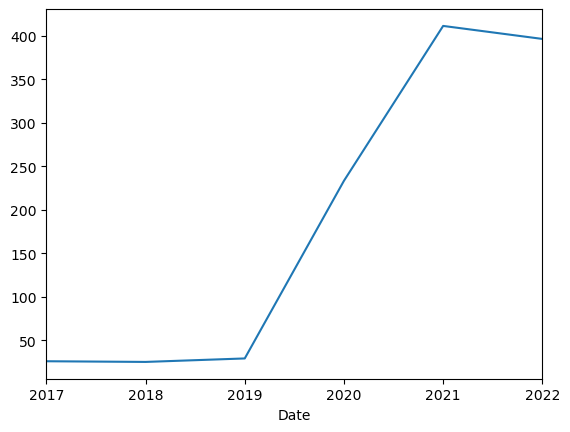

In [192]:
df_tesla.resample(rule="A").max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

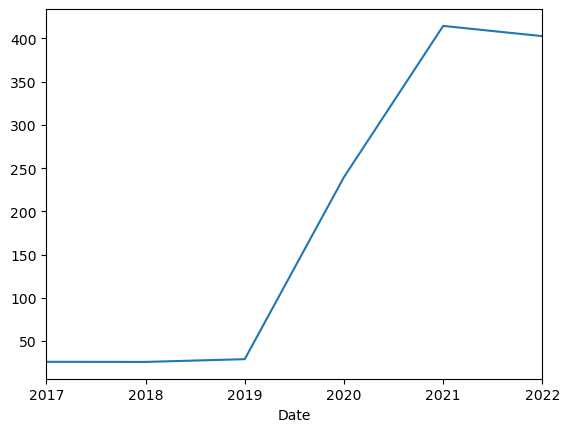

In [194]:
#update the rule with https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule="A").max()['High'].plot()

<AxesSubplot:xlabel='Date'>

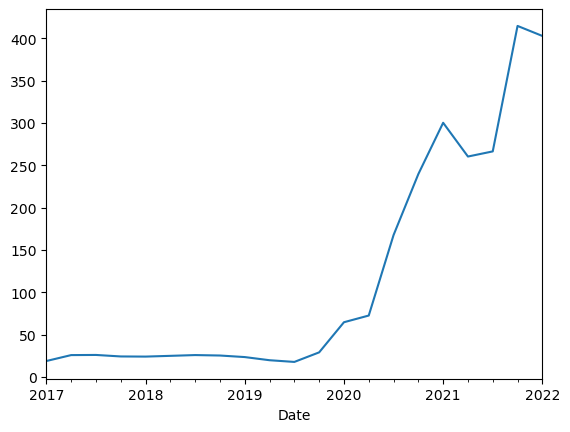

In [195]:
df_tesla.resample(rule="QS").max()['High'].plot()

<AxesSubplot:xlabel='Date'>

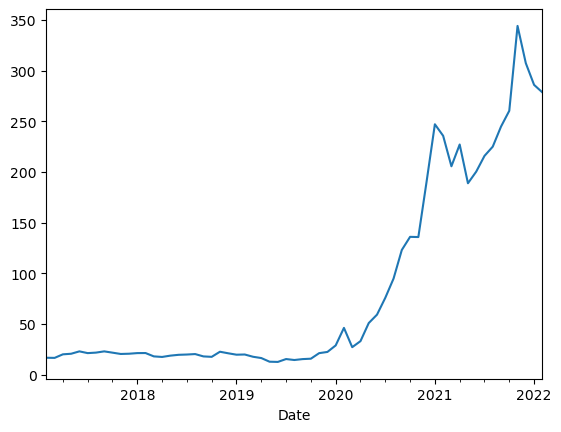

In [199]:
df_tesla.resample(rule="M").min()['High'].plot()

<AxesSubplot:xlabel='Date'>

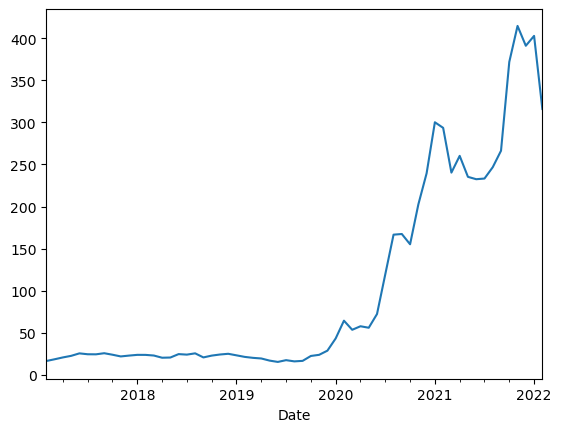

In [200]:
df_tesla.resample(rule="M").max()['High'].plot()

Date
2017-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2017-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2017-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2017-05-31    AxesSubplot(0.125,0.2;0.775x0.68)
2017-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
                            ...                
2021-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-11-30    AxesSubplot(0.125,0.2;0.775x0.68)
2021-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2022-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2022-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: M, Name: High, Length: 61, dtype: object

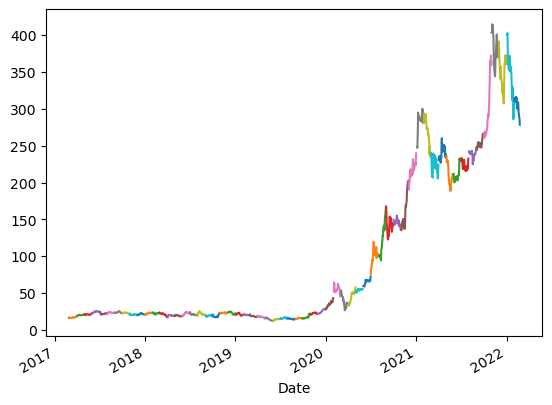

In [201]:
df_tesla.resample(rule="M")['High'].plot()

<AxesSubplot:xlabel='Date'>

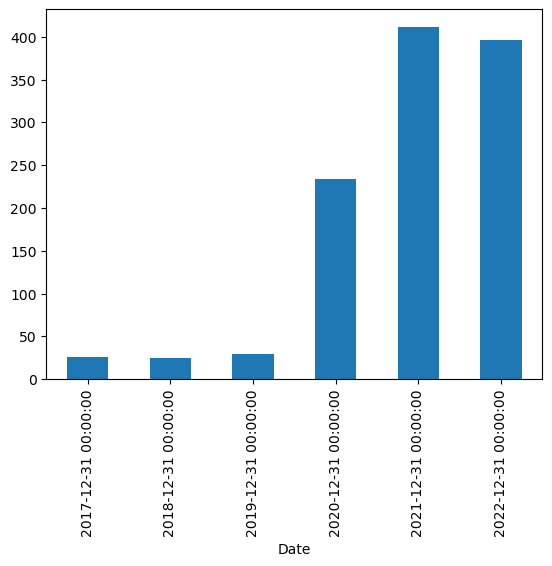

In [205]:
df_tesla.resample(rule="y").max()["Open"].plot(kind='bar')

<AxesSubplot:xlabel='Date'>

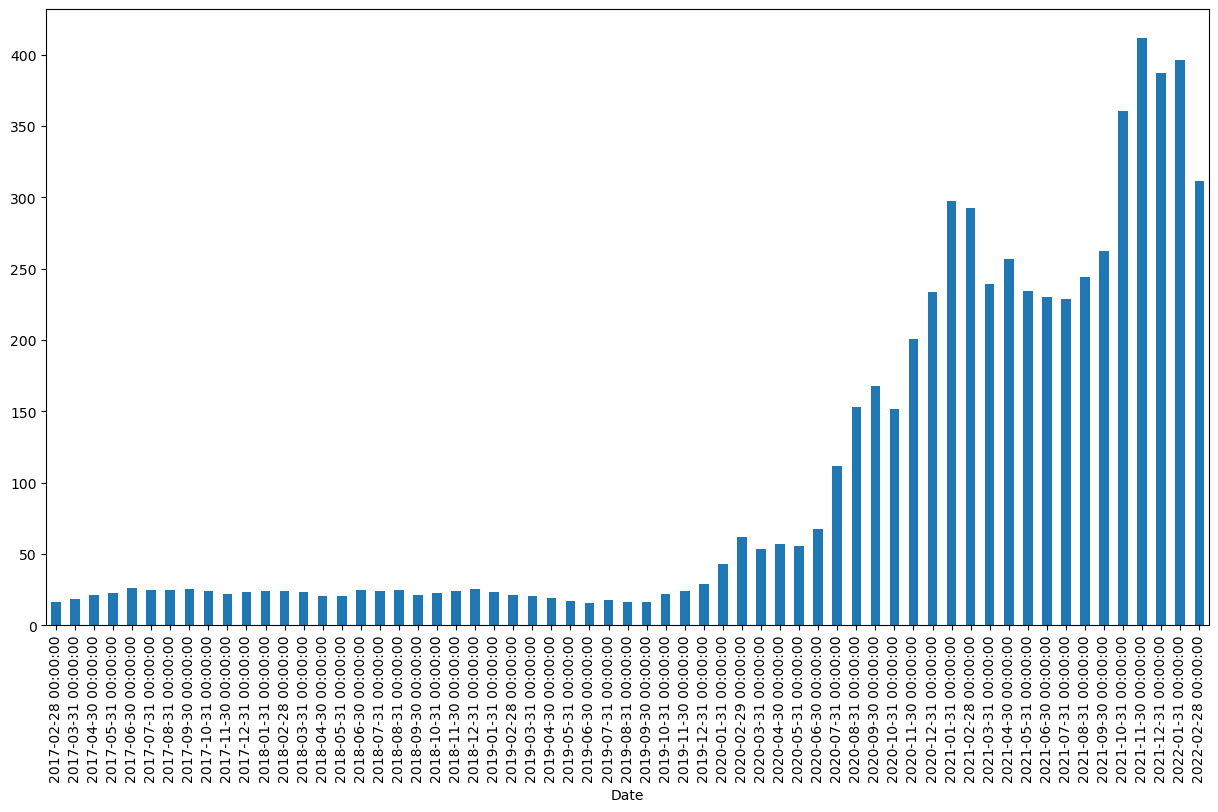

In [207]:
df_tesla.resample(rule="M").max()["Open"].plot(kind='bar',figsize=(15,8))

# mean Rolling expanding 

In [208]:
df_tesla.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333  171912000
2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   91171500
2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   72142500
2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   50277000
2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   43791000

In [218]:
df_tesla['High'].rolling(10).mean().head(10)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10    16.734733
Name: High, dtype: float64

In [238]:
df_tesla["30 days rolling"]=df_tesla["Open"].rolling(30).mean()

In [239]:
df_tesla.head(35)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333  171912000   
2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   91171500   
2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   72142500   
2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   50277000   
2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   43791000   
2017-03-06  16.527332  16.780001  16.500668  16.747334  16.747334   50332500   
2017-03-07  16.794666  16.926001  16.554667  16.572666  16.572666   51892500   
2017-03-08  16.466667  16.671333  16.354668  16.458000  16.458000   55878000   
2017-03-09  16.508667  16.577333  16.200001  16.326668  16.326668   58189500   
2017-03-10  16.414000  16.433332  16.200001  16.246000  16.246000   45994500   
2017-03-13  16.321333  16.456667  16.185333  16.411333  16.411333   45339000   
2017-03-14  16.407333  17.208000  16.401333  17.200001  17.200001  113976000   
2017-03-15  17.133333  17.400000  16.951332  17.048668  17.048668   79962000   
2017-03-16  17.493334  17.716667  17.270666  17.469999  17.469999  106983000   
2017-03-17  17.600000  17.688667  17.413334  17.433332  17.433332   97462500   
2017-03-20  17.373333  17.636667  17.254667  17.461332  17.461332   54214500   
2017-03-21  17.521999  17.653334  16.682667  16.712000  16.712000  103629000   
2017-03-22  16.770666  17.004667  16.700666  17.000668  17.000668   60889500   
2017-03-23  17.025999  17.177999  16.886667  16.985332  16.985332   49803000   
2017-03-24  17.046667  17.592667  17.000668  17.544001  17.544001   84709500   
2017-03-27  17.373333  18.038000  17.316668  18.014668  18.014668   93462000   
2017-03-28  18.468000  18.712000  18.333332  18.496668  18.496668  119814000   
2017-03-29  18.556000  18.639999  18.369333  18.492001  18.492001   55143000   
2017-03-30  18.535999  18.799999  18.480667  18.528000  18.528000   62226000   
2017-03-31  18.582001  18.645332  18.421333  18.553333  18.553333   49419000   
2017-04-03  19.126667  19.933332  18.972000  19.901333  19.901333  208329000   
2017-04-04  19.792667  20.320667  19.635332  20.246668  20.246668  152019000   
2017-04-05  20.136000  20.325333  19.613333  19.666668  19.666668  118213500   
2017-04-06  19.792000  20.129333  19.606667  19.913334  19.913334   82809000   
2017-04-07  19.833332  20.179333  19.809999  20.169333  20.169333   68694000   
2017-04-10  20.610001  20.915333  20.580667  20.826000  20.826000  114967500   
2017-04-11  20.892000  20.898001  20.366667  20.580667  20.580667   85869000   
2017-04-12  20.422667  20.563334  19.754667  19.789333  19.789333   90760500   
2017-04-13  19.780001  20.492666  19.686666  20.266666  20.266666  139269000   
2017-04-17  20.180000  20.266666  19.912001  20.096001  20.096001   62080500   

            30 days rolling   30 days rolling  
Date                                           
2017-02-27               NaN              NaN  
2017-02-28               NaN              NaN  
2017-03-01               NaN              NaN  
2017-03-02               NaN              NaN  
2017-03-03               NaN              NaN  
2017-03-06               NaN              NaN  
2017-03-07               NaN              NaN  
2017-03-08               NaN              NaN  
2017-03-09               NaN              NaN  
2017-03-10               NaN              NaN  
2017-03-13               NaN              NaN  
2017-03-14               NaN              NaN  
2017-03-15               NaN              NaN  
2017-03-16               NaN              NaN  
2017-03-17               NaN              NaN  
2017-03-20               NaN              NaN  
2017-03-21               NaN              NaN  
2017-03-22               NaN              NaN  
2017-03-23               NaN              NaN  
2017-03-24               NaN              NaN  


<AxesSubplot:xlabel='Date'>

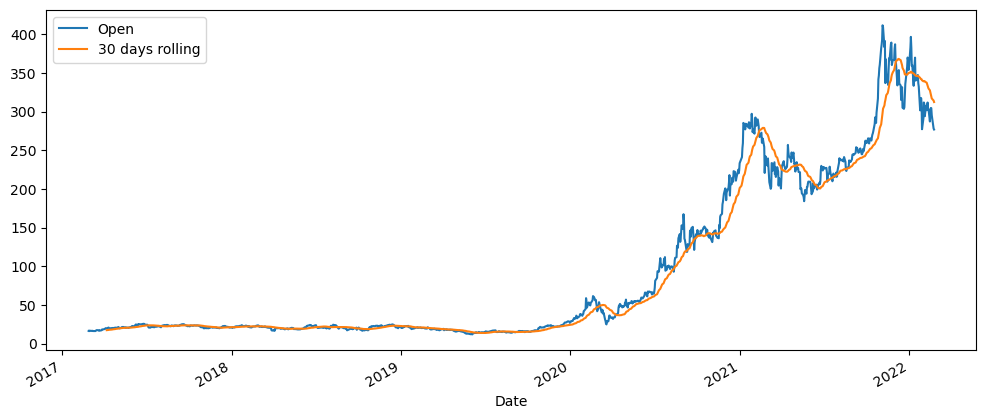

In [240]:
df_tesla[["Open","30 days rolling"]].plot(figsize=(12,5))

In [ ]:
#upward trend 
#downward trend
#cyclic tred
#stationary tred 
#rolling window
#resempling 
#expanding
#EWMA 
#why 3D actually it's not 3d it's just like simple x and y data after rolling on a specific window size x1,x2,x3,y on window =3
#figsize used to change the default size of the matplotlib plot set_figwidth(),and set_figheight() can be used to set height and width respectively while figsize can do both at the same time
#figsize,axes=plt.subplot  = "https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca"
#pandas data_reader = used for data fetching form various sources 
#simple project on time series analysis = done on TSLA model and signle variate time series analysis

ETS
ARIMA
ACF
PACF
SARIMAX


